# Zadaci – Python osnove (NumPy, matplotlib)

U nastavku se nalazi 5 zadataka. Svaki zadatak sadrži opis i podkorake u Markdown ćelijama, kao i prazne kod ćelije u koje treba upisati rešenje.

## Zadatak 1: NumPy – reshape, view i modifikacije

Dat je jednodimenzionalni NumPy niz koji sadrži uzastopne celobrojne vrednosti.

**Podzadaci:**
1. Napraviti NumPy niz `x` koji sadrži vrednosti od 1 do 12  
2. Preoblikovati niz u matricu dimenzija `(3, 4)` i sačuvati je u promenljivoj `X`  
3. Izmeniti vrednost elementa u prvom redu i prvoj koloni matrice `X`  
4. Proveriti da li je došlo do promene u originalnom nizu `x`  
5. Proveriti i prikazati broj dimenzija i tip podataka u `X` promenljivoj

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
x = np.arange(1,13)
X = x.reshape(3,4)
X[0,0] = 999
print(x,X)
X.ndim, X.dtype
X_new = copy.deepcopy(X)
X_new[0,0] = 123
print(X,X_new)

[999   2   3   4   5   6   7   8   9  10  11  12] [[999   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]
[[999   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]] [[123   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


## Zadatak 2: NumPy – slučajni brojevi i statistika

Rad sa generatorom slučajnih brojeva i statističkim operacijama.

**Podzadaci:**
1. Inicijalizovati generator slučajnih brojeva pomoću  
   `np.random.default_rng(2025)`  
2. Generisati matricu `X` dimenzija `(100, 5)` iz standardne normalne raspodele  
3. Izračunati srednju vrednost i standardnu devijaciju **po kolonama**  
4. Izračunati ukupnu varijansu cele matrice  
5. Uporediti ukupnu varijansu sa prosečnom varijansom po kolonama

In [6]:
rng = np.random.default_rng(2025)
X = rng.normal(size=(100,5))
#print(X[0])
mean_col = np.mean(X, axis=0)
print(mean_col)
std_col = np.std(X, axis=0)
print(std_col)
var_whole = np.var(X)
print(var_whole)
var_col = np.var(X, axis=0)
avrg_var_col = np.average(var_col)
if var_whole > avrg_var_col:
    print("Ukupna varijansa veca od prosecne")
elif var_whole < avrg_var_col:
    print("Ukupna varijansa manja od prosecne")
else:
    print("Varijanse su iste")
    

[-0.04002851  0.03674091 -0.14693154  0.14351709 -0.06568197]
[1.0206377  0.88550463 1.08774208 1.04617892 1.03712169]
1.045503753773302
Ukupna varijansa veca od prosecne


## Zadatak 3: NumPy – vektorizacija i korelacija

**Podzadaci:**
1. Generisati vektor `x` dužine 200 iz raspodele `N(0, 1)` (korisiti isti generator slučajnih brojeva iz prethodnog zadatka) 
2. Generisati šum `ε ~ N(0, 0.5)` i konstruisati vektor  
   `y = 3x + ε`  
3. Izračunati korelaciju između vektora `x` i `y` bez korišćenja petlji  
4. Izračunati srednju vrednost i standardnu devijaciju za oba vektora  
5. Prikazati sve dobijene vrednosti 

In [18]:
rng = np.random.default_rng(2025)
x = rng.normal(loc=0, scale=1, size=200)
eps = rng.normal(loc=0, scale=0.5, size=200)
print(x[0])
y = x*3 + eps
print(y[0:3])
mean_x = np.mean(x)
std_x = np.std(x)
mean_y = np.mean(y)
std_y = np.std(y)
print(mean_x, std_x, mean_y, std_y)
corr_x_y = np.corrcoef(x,y)
print(corr_x_y)


-2.221253875745377
[-6.30348804  0.22937073 -1.09717207]
-0.03385655250966062 1.1111468427639732 -0.09860476170769028 3.3989574834970067
[[1.         0.98877826]
 [0.98877826 1.        ]]


## Zadatak 4: Matplotlib – više subplotova u jednom redu (1×3)

Cilj zadatka je upoznavanje sa `matplotlib` funkcijom `subplots()`.

**Podzadaci:**
1. Generisati vektor `x` sa 100 slučajnih realnih vrednosti  
2. Napraviti jednu figuru sa tri subplota u jednom redu (1×3)
3. Na prvom subplotu prikazati linijski graf vektora `x`  
4. Na drugom subplotu prikazati histogram vektora `x`  
5. Na trećem subplotu prikazati scatter graf `(x, x²)`  
6. Svakom subplotu dodati odgovarajući naslov

[-2.22125388  0.02599965] [4.93396878e+00 6.75981938e-04]


<Figure size 640x480 with 0 Axes>

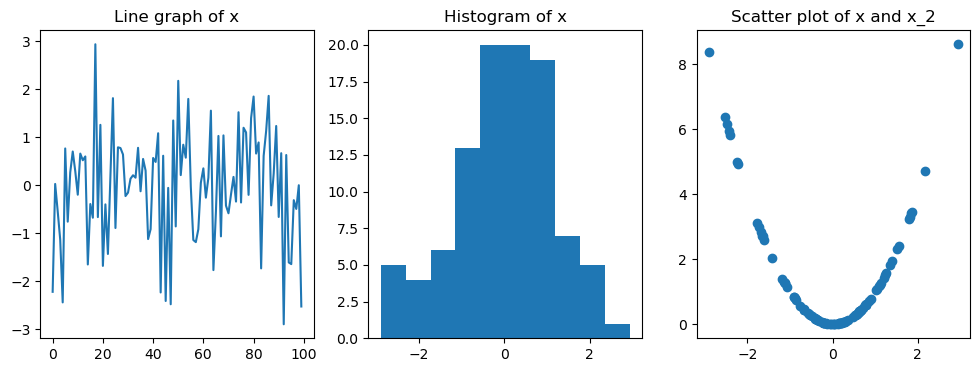

In [33]:
rng = np.random.default_rng(2025)
x = rng.normal(size=100)
x_new = copy.deepcopy(x)
x_2 = pow(x_new,2)
print(x_new[0:2], x_2[0:2])
plt.figure()
fig, plots = plt.subplots(1,3, figsize=(12,4))
plots[0].plot(x)
plots[0].set_title("Line graph of x")
plots[1].hist(x)
plots[1].set_title("Histogram of x")
plots[2].scatter(x,x_2)
plots[2].set_title("Scatter plot of x and x_2")
plt.show()


## Zadatak 5: Matplotlib – mreža subplotova (2×2)

U ovom zadatku koristi se složeniji raspored grafika.

**Podzadaci:**
1. Napraviti figuru sa mrežom **2×2 subplotova**  
2. Generisati dva vektora `x` i `y` iste dužine sa slučajnim vrednostima  
3. Prikazati sledeće grafike:
   - (0,0): scatter graf `x` vs `y`  
   - (0,1): scatter graf `x` vs `y` sa drugim markerom  
   - (1,0): linijski graf vektora `x`  
   - (1,1): histogram vektora `y`  
4. Podesiti naslov svakog od zadatih grafika  
5. Podesiti veličinu figure tako da svi grafici budu jasno vidljivi
6. Sačuvati grafik kao .png fajl

<Figure size 640x480 with 0 Axes>

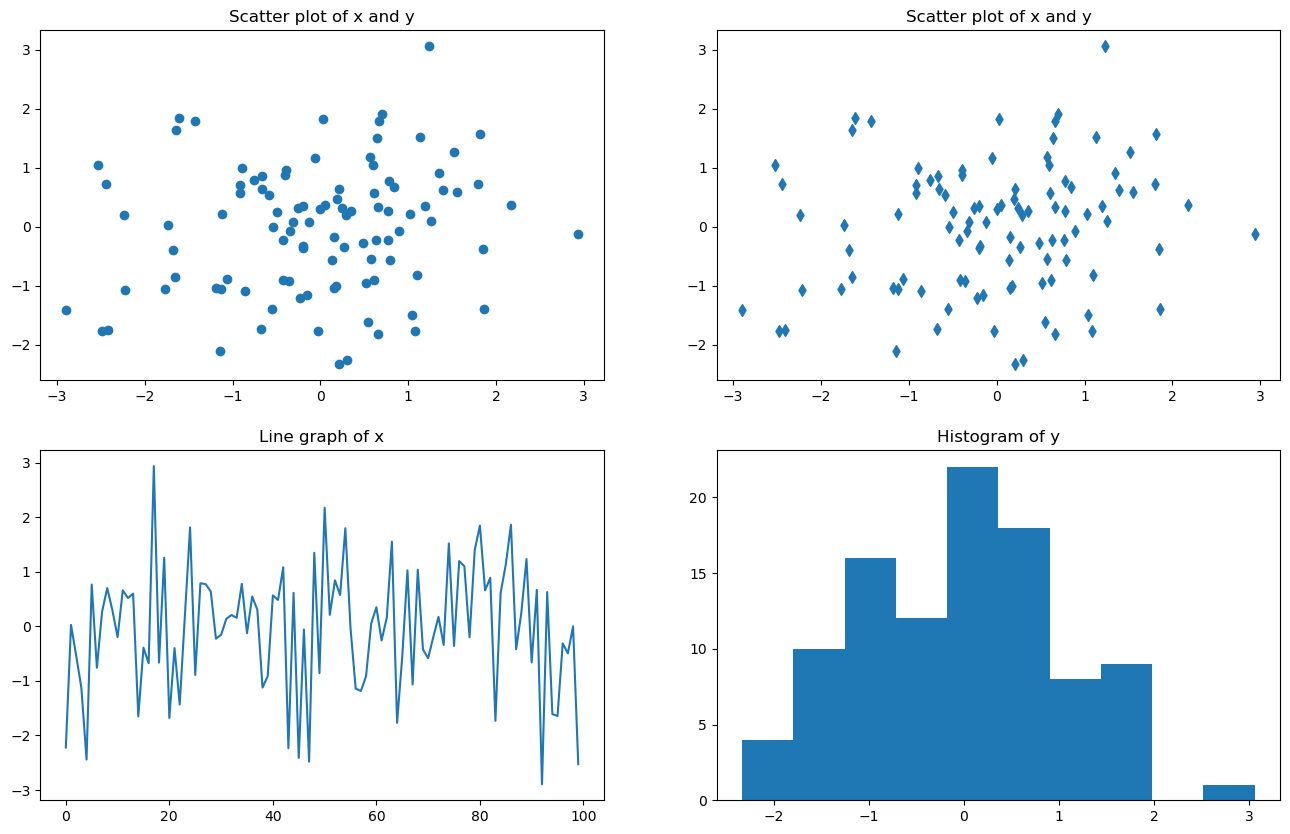

In [35]:
rng = np.random.default_rng(2025)
plt.figure()
x = rng.normal(size=100)
y = rng.normal(size=100)
fig, plots= plt.subplots(2,2, figsize=(16,10))
plots[0,0].scatter(x,y)
plots[0,0].set_title("Scatter plot of x and y")
plots[0,1].scatter(x,y, marker='d')
plots[0,1].set_title("Scatter plot of x and y")
plots[1,0].plot(x)
plots[1,0].set_title("Line graph of x")
plots[1,1].hist(y)
plots[1,1].set_title("Histogram of y")
plt.savefig('/home/student/Documents/peti_zadatak_slika_2_2.png')
plt.show()




